# Data Exploration
- Distribution of each variable
- Balance between classes (diabetes positive and negative)
- Identify missing values/anomalies

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_filepath = '../data/external/EarlyStageDiabetesRiskPredictionDataset_UCIMLRepo.csv'
UCI_Diabetes_Data = pd.read_csv(data_filepath)

**Summary of Dataset**

In [47]:
print(UCI_Diabetes_Data.describe()) # Data distribution of variables
print(UCI_Diabetes_Data.columns)

              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000
Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [48]:
categorical_columns = UCI_Diabetes_Data.drop('Age', axis = 1).columns
for col in categorical_columns:
    print(f"This is the data distribution of categorical column '{col}':")
    print(UCI_Diabetes_Data[col].value_counts())
    print()

This is the data distribution of categorical column 'Gender':
Male      328
Female    192
Name: Gender, dtype: int64

This is the data distribution of categorical column 'Polyuria':
No     262
Yes    258
Name: Polyuria, dtype: int64

This is the data distribution of categorical column 'Polydipsia':
No     287
Yes    233
Name: Polydipsia, dtype: int64

This is the data distribution of categorical column 'sudden weight loss':
No     303
Yes    217
Name: sudden weight loss, dtype: int64

This is the data distribution of categorical column 'weakness':
Yes    305
No     215
Name: weakness, dtype: int64

This is the data distribution of categorical column 'Polyphagia':
No     283
Yes    237
Name: Polyphagia, dtype: int64

This is the data distribution of categorical column 'Genital thrush':
No     404
Yes    116
Name: Genital thrush, dtype: int64

This is the data distribution of categorical column 'visual blurring':
No     287
Yes    233
Name: visual blurring, dtype: int64

This is the data

In [49]:
UCI_Diabetes_Data.isnull().sum() # Checking for missing values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

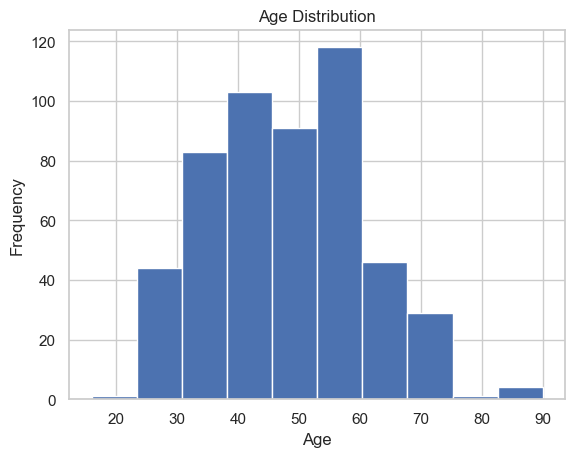

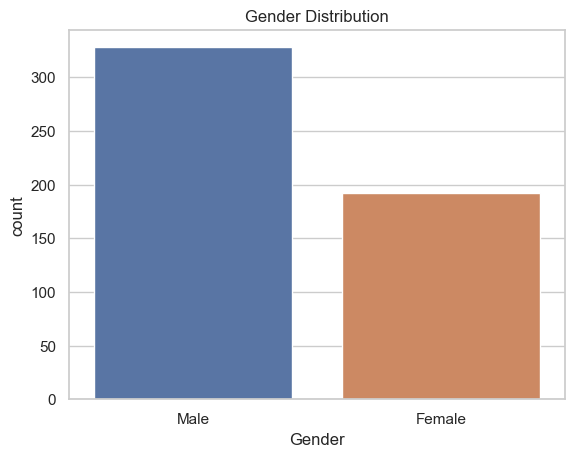

In [50]:
# Histogram for Age
plt.hist(UCI_Diabetes_Data['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for a categorical variable
sns.countplot(x='Gender', data=UCI_Diabetes_Data)
plt.title('Gender Distribution')
plt.show()

# Data Preprocessing

**one-hot encoding**

In [51]:
encoded_data = pd.get_dummies(UCI_Diabetes_Data, columns=categorical_columns, drop_first=True)

# Take a look at the encoded data
print(encoded_data.head())
print(encoded_data.columns)

   Age  Gender_Male  Polyuria_Yes  Polydipsia_Yes  sudden weight loss_Yes  \
0   40            1             0               1                       0   
1   58            1             0               0                       0   
2   41            1             1               0                       0   
3   45            1             0               0                       1   
4   60            1             1               1                       1   

   weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  visual blurring_Yes  \
0             1               0                   0                    0   
1             1               0                   0                    1   
2             1               1                   0                    0   
3             1               1                   1                    0   
4             1               1                   0                    1   

   Itching_Yes  Irritability_Yes  delayed healing_Yes  partial paresis_Yes  \
0 

**Feature Selection before building model**

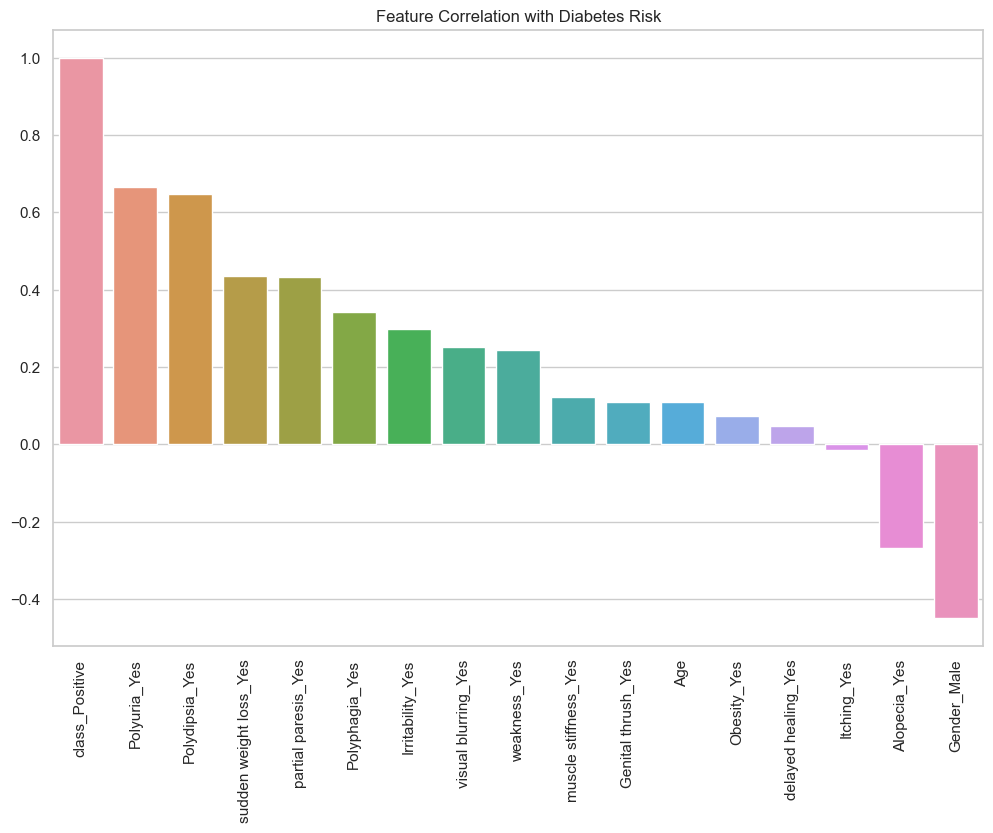

class_Positive            1.000000
Polyuria_Yes              0.665922
Polydipsia_Yes            0.648734
sudden weight loss_Yes    0.436568
partial paresis_Yes       0.432288
Polyphagia_Yes            0.342504
Irritability_Yes          0.299467
visual blurring_Yes       0.251300
weakness_Yes              0.243275
muscle stiffness_Yes      0.122474
Genital thrush_Yes        0.110288
Age                       0.108679
Obesity_Yes               0.072173
delayed healing_Yes       0.046980
Itching_Yes              -0.013384
Alopecia_Yes             -0.267512
Gender_Male              -0.449233
Name: class_Positive, dtype: float64


In [52]:
correlation_matrix = encoded_data.corr()

target_correlation = correlation_matrix['class_Positive'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Diabetes Risk')
plt.show()

print(correlation_matrix['class_Positive'].sort_values(ascending=False))

# Visualizing correlations
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()


- Features like `Polyuria_Yes`, `Polydipsia_Yes`, and others that show a strong positive correlation with class_Positive -> must be included in model
- Features like `Alopecia_Yes` and `Gender_Male`, which show negative correlations -> their absence (or presence -ve values) indicative of outcome
- Features with v.low correlation coefficients -> might contribute less ->  **Might have non-linear relationships with target variable so won't remove them just yet**

**Data Splitting**

In [53]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop('class_Positive', axis=1)
y = encoded_data['class_Positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building
- Training the Random Forest Model
- Hyperparameter Tuning

**Model Training**

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=150, 
    max_depth=15, 
    min_samples_split=4, 
    min_samples_leaf=2
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=150, random_state=42)

**Model Evaluation**

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9711538461538461
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979


**Hyperparameter Tuning**

In [56]:
 from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]})

**Re-evaluate Tuned Model**

In [57]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9903846153846154
Precision: 1.0
Recall: 0.9859154929577465
F1 Score: 0.9929078014184397


**Cross Validation**

In [58]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validated Accuracy Scores:", scores)


Cross-Validated Accuracy Scores: [0.96153846 0.99038462 0.92307692 0.99038462 1.        ]


**Feature Importance Analysis**

In [59]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))

                   Feature  Importance
2             Polyuria_Yes    0.249122
3           Polydipsia_Yes    0.194944
1              Gender_Male    0.101969
0                      Age    0.076550
4   sudden weight loss_Yes    0.064104
12     partial paresis_Yes    0.048469
14            Alopecia_Yes    0.042588
10        Irritability_Yes    0.039219
11     delayed healing_Yes    0.030459
8      visual blurring_Yes    0.025991
9              Itching_Yes    0.025132
6           Polyphagia_Yes    0.023798
7       Genital thrush_Yes    0.022725
13    muscle stiffness_Yes    0.020885
5             weakness_Yes    0.019532
15             Obesity_Yes    0.014514
